In [405]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, lognorm
from scipy.stats import poisson, pareto, burr, burr12, pearsonr, gamma
import seaborn as sns
import random
import pandas as pd
import statistics
import csv
from statistics import geometric_mean, harmonic_mean
import pylab as pb
import statsmodels.api as sm

### Ogólny opis

Dane pochodzą ze strony finance.yahoo.com, Y - kurs euro przez 5 lat, X - kurs PLN przez 5 lat ( 17.04.2017 - 17.04.2022)

In [291]:
Y = pd.read_csv ('EURUSD.csv')
X = pd.read_csv('GBPUSD.csv')

In [292]:
def ecdf(xdata):
    xdataecdf = np.sort(xdata)
    ydataecdf = np.arange(1, len(xdata) + 1) / len(xdata)
    return xdataecdf, ydataecdf

In [293]:
def cor_pearson(X,Y):
        S = np.std(X)*np.std(Y)
        su = 0
        for i in range(len(X)):
            if X[i] == 'null' or Y[i] == 'null':
                pass
            else:
                su +=  X[i]*Y[i]
        av_X = np.sum(X)/len(X)
        av_Y = np.sum(Y)/len(Y)
        res = (su-len(X)*av_X*av_Y)/((len(X))*S)
        return res

In [377]:
x = X['Open']
y = Y['Open']

In [295]:
cor_pearson(x,y)

0.768551989952148

In [296]:
pearsonr(x,y)

(0.7685519899521094, 1.2917641742138809e-254)

In [387]:
def per():
    p = []
    for k in np.arange(2,1304,1):
        p.append(pearsonr(x[:k],y[:k])[0])
    return p

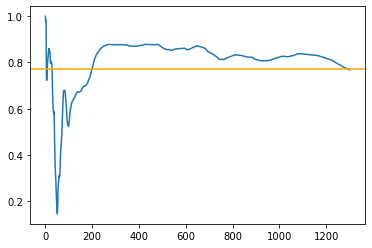

In [404]:
p = per()
#plt.scatter(x,y, color='orange')
#plt.plot(np.arange(1.13,1.45,0.0002459646),p)
plt.plot(p)
plt.axhline(0.77, color = 'orange')

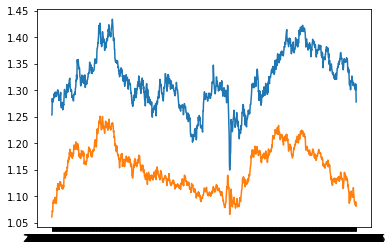

In [397]:
xd = X['Date']
yd = Y['Date']
plt.plot(xd,x)
plt.plot(yd,y)

C:\Users\kjani\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


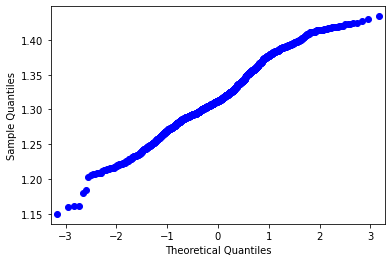

In [406]:
sm.qqplot(x)
pb.show()

C:\Users\kjani\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


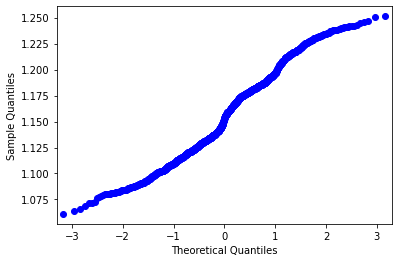

In [407]:
sm.qqplot(y)
pb.show()

### Statystyki 

In [297]:
def charact(X):
    mediana = statistics.median(X)
    q25, q75 = X.quantile([0.25,0.75])
    rozst_mkw = q75 - q25
    proba = X
    xmin, xmax = min(proba), max(proba)
    rozst = xmax - xmin
    wariancja = statistics.variance(X)
    odchylenie = statistics.stdev(X)
    wspl = odchylenie/proba.mean() * 100
    print('Mediana: %s'%mediana)
    print('Kwartyle: %s, %s'%(q25,q75))
    print('rozstęp międzykwartylowy: %s'%rozst_mkw)
    print('rozstęp: %s'%rozst)
    print('wariancja:%s'%wariancja)
    print('odchylenie:%s '%odchylenie)
    print('współczynnik zmienności:%s'%wspl)

In [298]:
charact(x)

Mediana: 1.311992
Kwartyle: 1.2866285, 1.3558219999999999
rozstęp międzykwartylowy: 0.06919349999999991
rozstęp: 0.284548
wariancja:0.0025736786941082247
odchylenie:0.05073143694109428 
współczynnik zmienności:3.850006984948852


In [299]:
charact(y)

Mediana: 1.153216
Kwartyle: 1.1207115, 1.1842519999999999
rozstęp międzykwartylowy: 0.06354049999999978
rozstęp: 0.19014599999999993
wariancja:0.0017262886618688127
odchylenie:0.041548630084141315 
współczynnik zmienności:3.6000478265090043


### Wykresy X

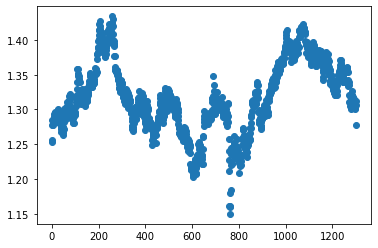

In [329]:
plt.scatter(np.arange(len(x)),x)
plt.savefig('X_sc.png')

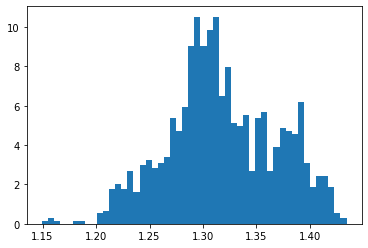

In [330]:
plt.hist(x, density = True, bins=50)
plt.savefig('X_hist.png')
#plt.hist(y, density = True, bins=50)
#plt.plot(np.arange(3,5,0.01),norm.pdf(np.arange(3,5,0.01),3.8,1/7))

No handles with labels found to put in legend.


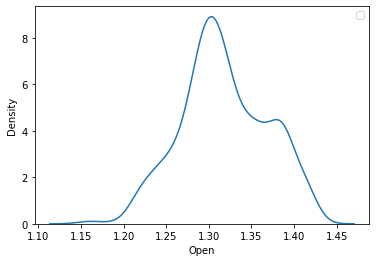

In [403]:
sns.kdeplot(x)
#sns.kdeplot(y,label='EUR',color='green')
plt.legend()
plt.savefig('X_kde.png')

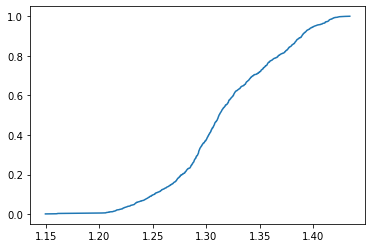

In [333]:
x_x,x_y = ecdf(x)
plt.plot(x_x,x_y)
plt.savefig('X_cdf.png')
#plt.plot(np.arange(3,5,0.01),norm.cdf(np.arange(3,5,0.01),3.8,1/7))

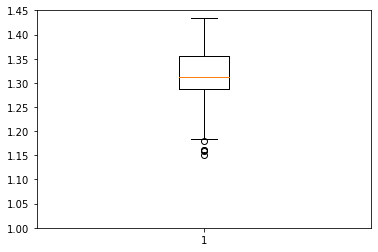

In [360]:
plt.boxplot(x)
plt.ylim([1,1.45])
plt.savefig('X_box.png')

### Wykresy Y

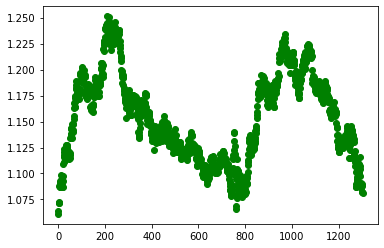

In [361]:
plt.scatter(np.arange(len(y)),y,color='green')
plt.savefig('Y_sc.png')

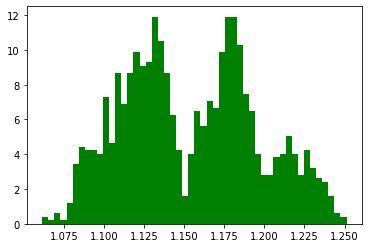

In [362]:
plt.hist(y, density = True, bins=50,color='green')
plt.savefig('Y_hist.png')
#plt.plot(np.arange(1.05,1.25,0.001), [abs(31*np.sin(20*x)*np.cos(20*x)**2) for x in np.arange(1,1.2,0.001)])

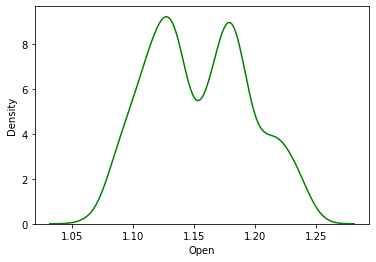

In [363]:
sns.kdeplot(y,color='green')
plt.savefig('Y_kde.png')

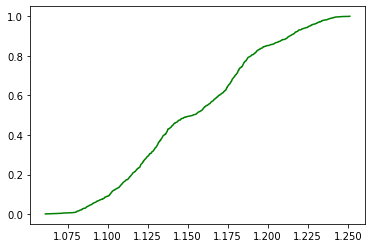

In [364]:
y_x,y_y = ecdf(y)
plt.plot(y_x,y_y,color='green')
plt.savefig('Y_cdf.png')
#plt.plot(y_x,[-(31*np.cos(20*x)**3-31)/60 for x in y_x])

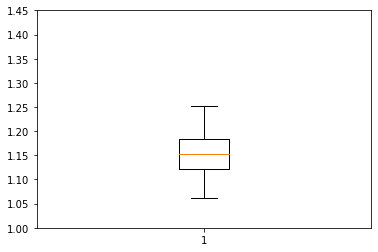

In [365]:
plt.boxplot(y)
plt.ylim([1,1.45])
plt.savefig('Y_box.png')

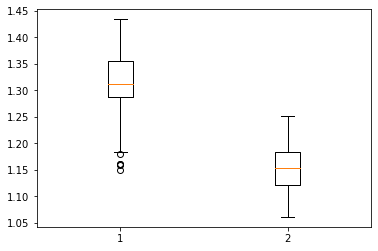

In [340]:
plt.boxplot([x,y])
plt.savefig('XY_box.png')

### Średnie

In [311]:
def average(x):
    average = []
        #aritmetic
    asum = 0
    for row in x:
        asum += row
    aritmetic = asum/len(x)
    average.append(aritmetic)
    #geometric
    l = []
    for row in x:
        l.append(row)
    average.append(geometric_mean(l))
    #harmonic
    l = []
    for row in x:
        l.append(row)
    average.append(harmonic_mean(l))
    print('Średnia arytmetyczna: %f'%average[0])
    print('Średnia geometryczna: %f'%average[1])
    print('Średnia harmoniczna: %f'%average[2])
    print('---------------------')

In [312]:
average(x)

Średnia arytmetyczna: 1.317697
Średnia geometryczna: 1.316720
Średnia harmoniczna: 1.315740
---------------------


In [313]:
average(y)

Średnia arytmetyczna: 1.154113
Średnia geometryczna: 1.153368
Średnia harmoniczna: 1.152626
---------------------


In [315]:
def trimwins2():
    trimm = []
    rows = []
    wins = []
    with open("GBPUSD.csv",'r') as file:
        cs = csv.reader(file)
        headers = next(cs)[1:]
        for row in cs:
            rows.append(row)
        for i in [1,3,4]:
            l = []
            for row in rows:
                l.append(float(row[i]))
            l.sort()
            g = []
            for k in np.arange(1,10,1):
                le = len(l)
                z = le-k
                a = k+1
                l = l[a:z]
                j = 1/(le-2*k)*sum(l)
                g.append(j)
            trimm.append(g)
        for i in [1,3,4]:
            l = []
            for row in rows:
                l.append(float(row[i]))
            l.sort()
            g = []
            for k in np.arange(1,10,1):
                le = len(l)
                a = k+1
                b = k+2
                c = le-k-1
                f = sum(l[b:c])
                j = 1/le*(a*l[k+1]+f+a*l[le-k])
                g.append(j)
            wins.append(g)
    return [trimm,wins]

In [316]:
def trimwins3():
    trimm = []
    rows = []
    wins = []
    with open("EURUSD.csv",'r') as file:
        cs = csv.reader(file)
        headers = next(cs)[1:]
        for row in cs:
            rows.append(row)
        for i in [1,3,4]:
            l = []
            for row in rows:
                l.append(float(row[i]))
            l.sort()
            g = []
            for k in np.arange(1,10,1):
                le = len(l)
                z = le-k
                a = k+1
                l = l[a:z]
                j = 1/(le-2*k)*sum(l)
                g.append(j)
            trimm.append(g)
        for i in [1,3,4]:
            l = []
            for row in rows:
                l.append(float(row[i]))
            l.sort()
            g = []
            for k in np.arange(1,10,1):
                le = len(l)
                a = k+1
                b = k+2
                c = le-k-1
                f = sum(l[b:c])
                j = 1/le*(a*l[k+1]+f+a*l[le-k])
                g.append(j)
            wins.append(g)
    return [trimm,wins]

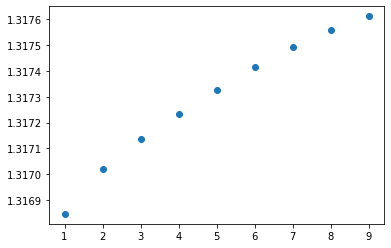

In [341]:
u = np.arange(1,10,1)
fun = trimwins2()
plt.scatter(u,fun[0][0]) #X ucinana
plt.savefig('X_trim.png')

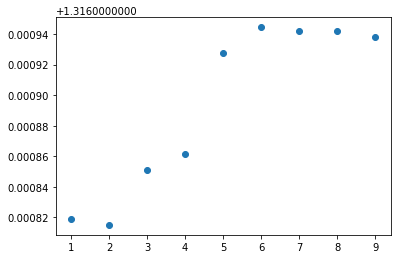

In [342]:
plt.scatter(u,fun[1][0]) #X winsor
plt.savefig('X_wins.png')

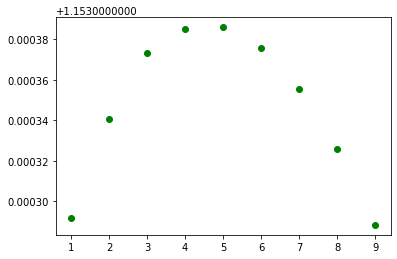

In [354]:
fun2 = trimwins3()
plt.scatter(u,fun2[0][0],color='green') #Y ucinana
plt.savefig('Y_trim.png')

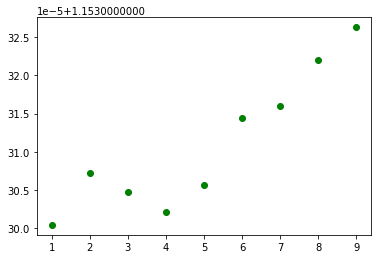

In [355]:
plt.scatter(u,fun2[1][0],color='green') #Y winsor
plt.savefig('Y_wins.png')